# Lab 1: Regression

Welcome to the advanced Machine Learning Course.

The objective of this lab session is to code a few regression algorithms and to apply them to synthetic and real datasets.

We begin with the standard imports:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

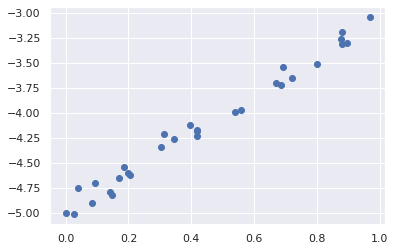

In [48]:
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* rng.randn(30)
plt.scatter(x, y);

Fill in the MultivariateLinearRegression class whose method fit takes a matrix $X$ and an array $y$ as input and returns an array of coefficients

In [49]:
class MultivariateLinearRegression():
    # Class for least-squares linear regression:

    def __init__(self, learning_rate = 0.01, iterations = 1000):
        self.learning_rate, self.iterations = learning_rate, iterations
        
    def fit(self, X, y):
        
        # Create the new X with the first column of 1
        self.X_fit = np.c_[np.ones((len(X), 1)), X]

        self.m, self.n = self.X_fit.shape
        self.y = y

        # Using the method of Gradient Descent
        # weight initialization  
        self.W = np.zeros(self.n)

        # Create list of values of cost function to examine convergence/ draw the plot
        self.cost_list = []

        i = 0
        while (len(self.cost_list) < 2 or abs(self.cost_list[-1] - self.cost_list[-2]) > 10e-6) and i < self.iterations:           
            self.update_weights()    
            i += 1
        
        # draw the plot of cost function
        plt.plot(np.arange(1, i), self.cost_list[1:], color = 'red')
        plt.title('Cost function Graph')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost')
        plt.show()

        return self

    def update_weights(self):
  
        # calculate gradients      
        gradient = 2 / self.m * self.X_fit.T.dot(self.X_fit.dot(self.W) - self.y)

        # update weights
        self.W -= self.learning_rate * gradient
        
        # update cost function
        cost_value = np.linalg.norm(self.X_fit.dot(self.W) - self.y) / 2
        self.cost_list.append(cost_value)

        return self   

    def predict(self, X):    

        return X.dot(self.W)

### Try your model on the data and plot the data points and the fitted line:

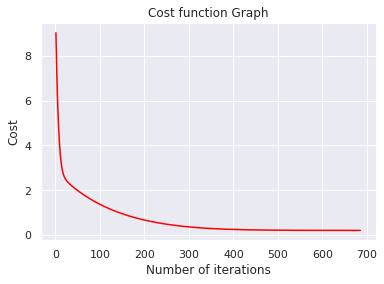

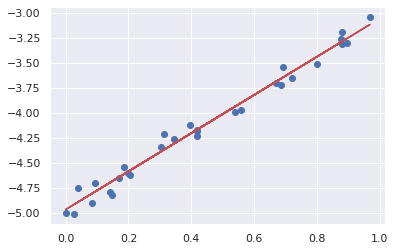

In [50]:
model = MultivariateLinearRegression(learning_rate = 0.05, iterations = 5000)
model.fit(x, y)

xfit = np.c_[np.ones((len(x), 1)), x]
yfit= model.predict(xfit)  

plt.scatter(x, y, c = 'b')
plt.plot(x, yfit, c = 'r')
plt.show()

Print the slope and the intercept:

In [51]:
print("Model slope:    ", model.W[0])
print("Model intercept:", model.W[1])

Model slope:     -4.966696676800659
Model intercept: 1.909345486743802


We see that the results are very close to the inputs, as we might hope.

Of course our linear regression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building a toy example:

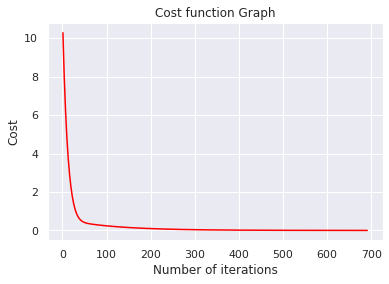

[ 0.49931777  1.50011825 -1.99986305  1.00015018]


In [52]:
rng = np.random.RandomState(1)
X = 3 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model = MultivariateLinearRegression(learning_rate = 0.05, iterations = 1000)
model.fit(X, y) # perfect fitting
print(model.W)

Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can our estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [45]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(5, include_bias=False) # with or without intercept
poly.fit_transform(x[:, None])

array([[   2.,    4.,    8.,   16.,   32.],
       [   3.,    9.,   27.,   81.,  243.],
       [   4.,   16.,   64.,  256., 1024.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression

With this transform, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

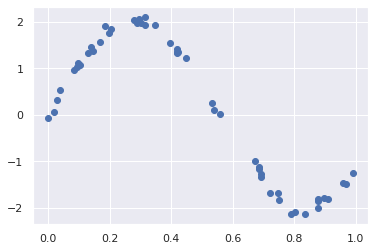

In [53]:
rng = np.random.RandomState(1)
x = rng.rand(50)
y = 2 * np.sin(1.8*np.pi*x) + 0.1 * rng.randn(50)


plt.scatter(x, y)

### Fit the linear model with polynomial features on the sine wave. Try with different degrees. Plot the fitted curve along with the data

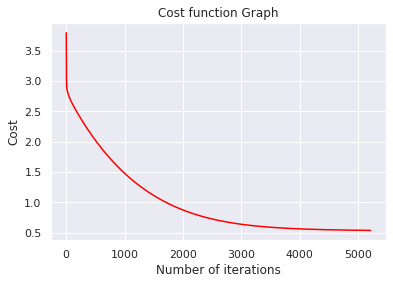

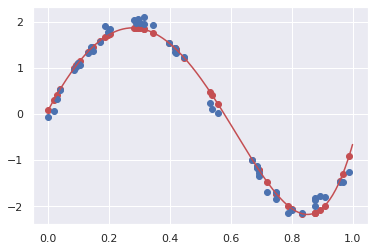

In [54]:

poly = PolynomialFeatures(5, include_bias=False) # with or without intercept
xfit = poly.fit_transform(x[:, None])

model = MultivariateLinearRegression(learning_rate = 0.5, iterations = 30000)
model.fit(xfit, y)

xfit = np.c_[np.ones((len(xfit), 1)), xfit]
yfit= model.predict(xfit)  

x_line = np.linspace(0.0, 1.0, num = 200)
xfit2 = poly.fit_transform(x_line[:, None])
xfit2 = np.c_[np.ones((len(xfit2), 1)), xfit2]
y_line = model.predict(xfit2)

plt.plot(x_line, y_line, c = 'r')
plt.scatter(x, yfit, c = 'r')
plt.scatter(x, y)
plt.show()

Our linear model can provide an excellent fit to this non-linear data!

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting and numeric problems.

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.

 Fill in the following class:

In [21]:
class RidgeRegularization():
    # Class for least-squares linear regression:

    def __init__(self, learning_rate = 0.01, iterations = 1000, alpha = 0.5):
        self.learning_rate, self.iterations, self.alpha = learning_rate, iterations, alpha
        
    def fit(self, X, y):

        self.X_fit = np.c_[np.ones((len(X), 1)), X]

        self.m, self.n = self.X_fit.shape

        # weight initialization        
        self.W = np.zeros(self.n)

        self.y = y

        # Create list of values of cost function to examine convergence/ draw the plot
        self.cost_list = []

        i = 0
        while (len(self.cost_list) < 2 or abs(self.cost_list[-2] - self.cost_list[-1]) > 10e-5) and i < self.iterations:           
            self.update_weights()    
            i += 1

        # draw the plot of cost function
        plt.plot(np.arange(1, i), self.cost_list[1:], color = 'red')
        plt.title('Cost function Graph')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost')
        plt.show()

        return self

    def update_weights(self):

        y_pred = self.predict(self.X_fit)
          
        # calculate gradients      
        dW = ( - ( 2 * (self.X_fit.T).dot(self.y - y_pred)) + (2 * self.alpha * self.W)) / self.m     
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    

        # update cost function
        cost_value = np.linalg.norm(y_pred - self.y) / 2 + self.alpha * np.linalg.norm(self.W)
        self.cost_list.append(cost_value)

        return self  
    
    def predict(self, X):    
        return X.dot(self.W)

### Try the vanilla linear model then the ridge regression for different value of regularisation on the following data 

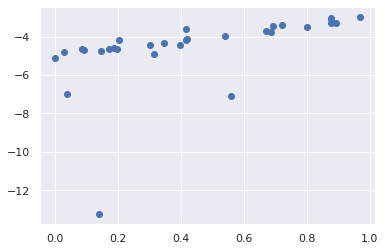

In [22]:
np.random.seed(300)
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* np.random.standard_cauchy(30)
plt.scatter(x, y);

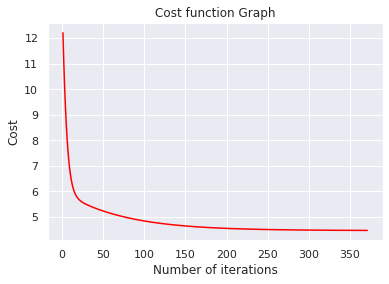

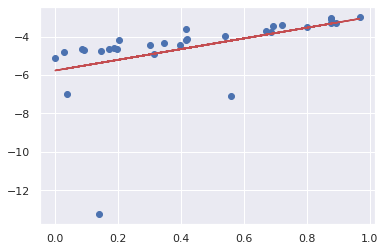

[-5.7670533   2.77926991]


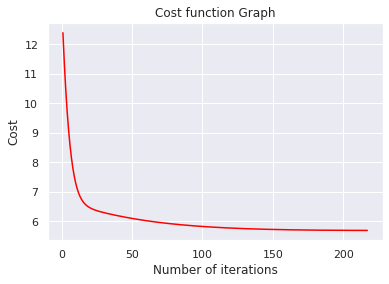

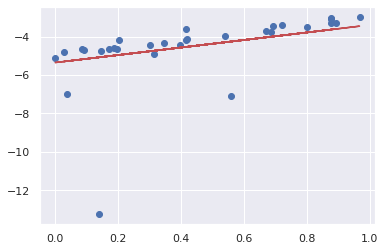

[-5.35396443  1.95396032]


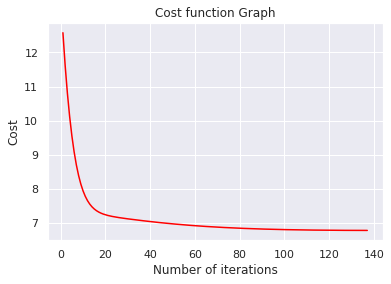

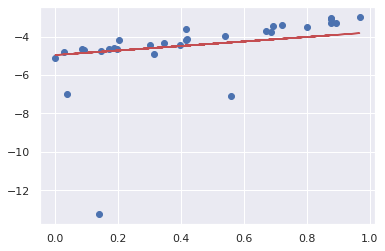

[-4.96189488  1.17272638]


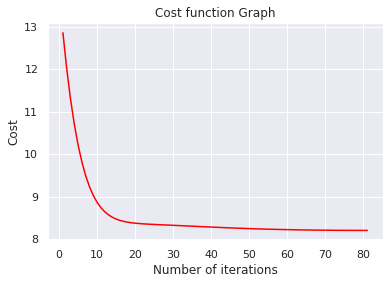

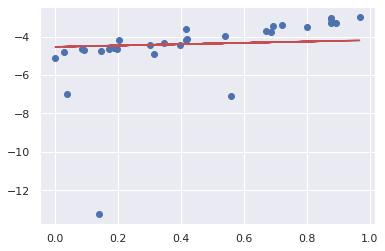

[-4.53568937  0.34390455]


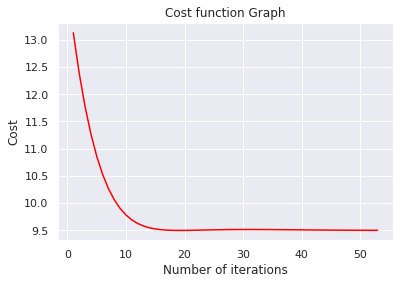

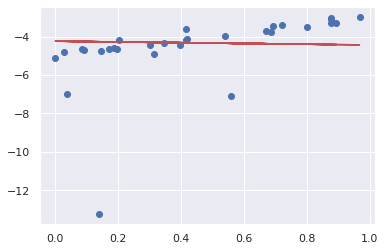

[-4.24314261 -0.1953386 ]


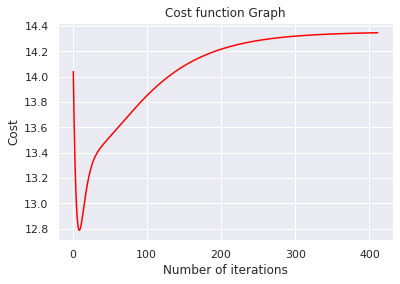

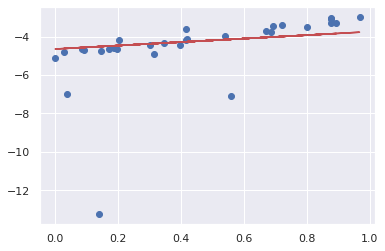

[-4.64892799  0.90079953]


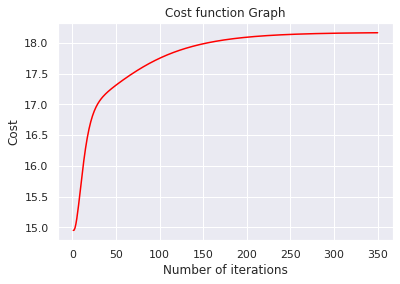

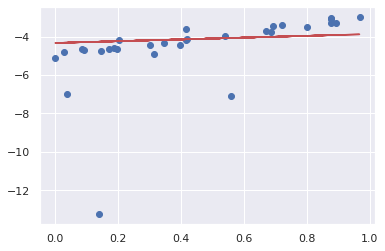

[-4.33466121  0.46249743]


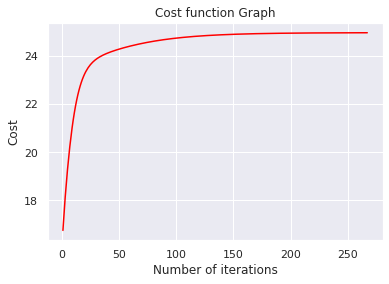

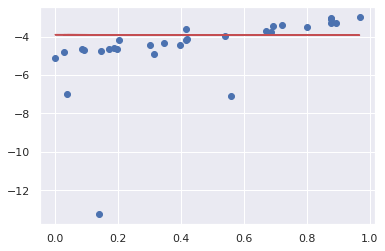

[-3.90527842 -0.02452449]


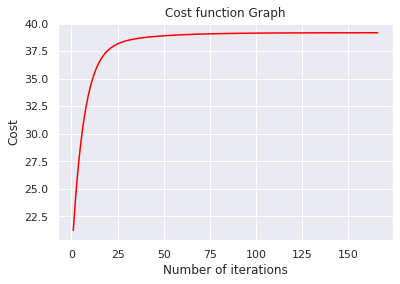

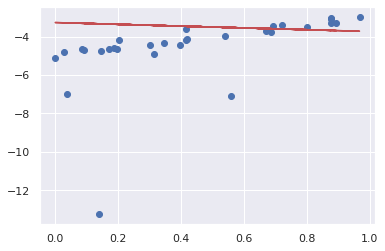

[-3.27282567 -0.4665304 ]


In [23]:
for i in [0,0.2,0.4,0.7,1,2,3,5,10]:
    model = RidgeRegularization(iterations = 5000, learning_rate = 0.05, alpha = i)
    model.fit(x, y)

    xfit = np.c_[np.ones((len(x), 1)), x]
    yfit= model.predict(xfit)  

    plt.plot(x, yfit, c = 'r')
    plt.scatter(x, y)
    plt.show()
    print(model.W)

### Which range of value for the regularization constraint would you choose ? Why ? 

From the plots we can say that alpha = 0.2 is the best parameter among all the values. When the penalty is too big(say, alpha = 10), the coefficients stay non-zero but they are far from the true values.

### Lasso regression ($L_1$ Regularization)

In [70]:
from sklearn.linear_model import LinearRegression

class LassoRegression():
    # Class for least-squares linear regression:

    def __init__(self, learning_rate = 1e-3, iterations = 5000, alpha = 0.5):
        self.learning_rate, self.iterations, self.alpha = learning_rate, iterations, alpha
        
    def soft_threshold(self, alpha, beta):
        if beta > alpha:
            return beta - alpha
        elif beta < -alpha:
            return beta + alpha
        else:
            return 0
    
    def fit(self, X, y):
        
        self.X_fit = np.c_[np.ones((len(X), 1)), X]

        self.m, self.n = self.X_fit.shape

        # weight initialization        
        self.W = np.zeros(self.n)
        
        self.y = y
        self.W[0] = np.mean(self.y)
        # Create list of values of cost function to examine convergence/ draw the plot
        self.cost_list = []

        i = 0
        while (len(self.cost_list) < 2 or abs(self.cost_list[-2] - self.cost_list[-1]) > 10e-5) and i < self.iterations:           
            self.update_weights()    
            i += 1

        # draw the plot of cost function
        plt.plot(np.arange(1, i), self.cost_list[1:], color = 'red')
        plt.title('Cost function Graph')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost')
        plt.show()
       
        return self

    def update_weights(self):

        y_pred = self.predict(self.X_fit)

        # calculate gradients      
        #gradient = 2 / self.m * self.X_fit.T.dot(y_pred - self.y)
        gradient = 2 / self.m * self.X_fit.T.dot(self.X_fit.dot(self.W) - self.y)
        # lasso regularizor
        lasso_proximal = np.sign(gradient) * self.soft_threshold(np.linalg.norm(gradient, ord = 1), self.learning_rate * self.alpha)

        # update weights
        self.W -= self.learning_rate * gradient + lasso_proximal

        # update cost function
        cost_value = np.linalg.norm(y_pred - self.y) / 2 + self.alpha * np.linalg.norm(self.W, ord = 1)
        self.cost_list.append(cost_value)

        return self   
                
    def predict(self, X):
        return X.dot(self.W)
        

### Fit the Lasso regression for different value of regularisation on the following data.

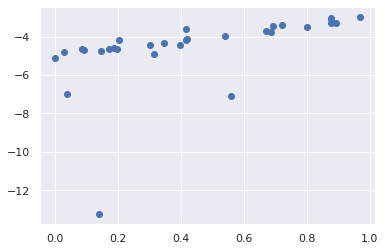

In [71]:
np.random.seed(300)
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* np.random.standard_cauchy(30)
plt.scatter(x, y);
plt.show()

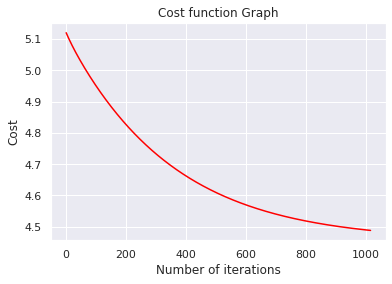

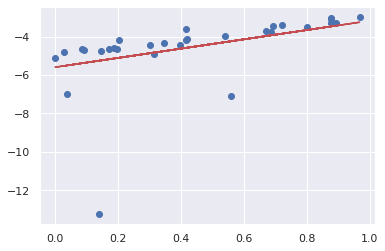

[-5.59448936  2.41273837]


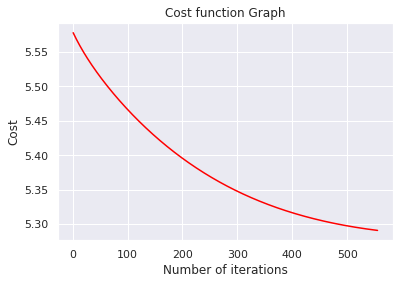

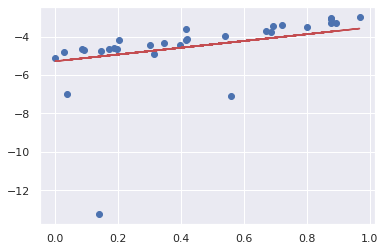

[-5.28557563  1.75659502]


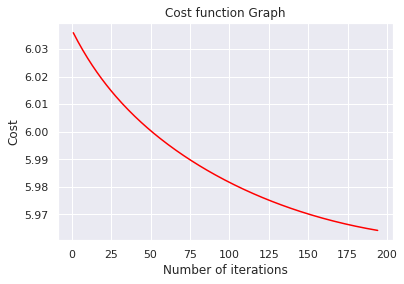

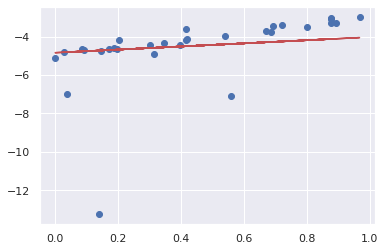

[-4.84110743  0.81055013]


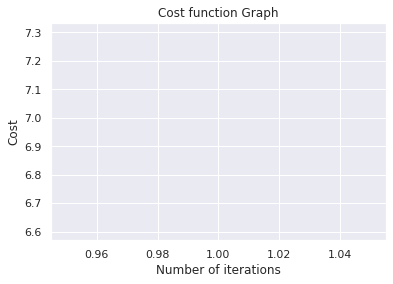

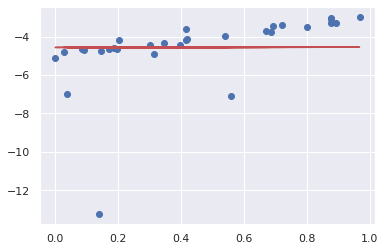

[-4.56712561  0.01107815]


In [80]:
for i in [0,0.1,0.2,0.4]:
    model = LassoRegression(iterations = 5000, learning_rate = 1e-2, alpha = i)
    model.fit(x, y)

    xfit = np.c_[np.ones((len(x), 1)), x]
    yfit= model.predict(xfit)  

    plt.plot(x, yfit, c = 'r')
    plt.scatter(x, y)
    plt.show()
    print(model.W)

### Try regularisation term greater than 10 for Ridge and Lasso. Compare the obtained. coefficients Explain the difference

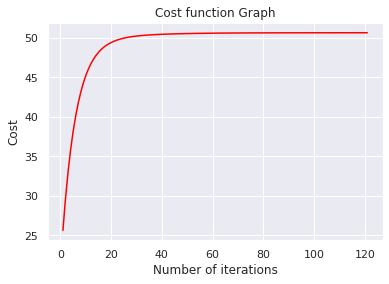

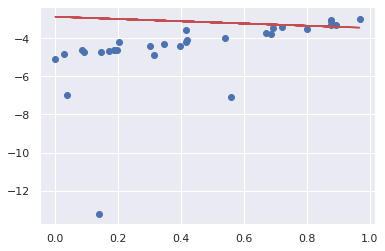

[-2.87345142 -0.58968478]


In [82]:
model = RidgeRegularization(iterations = 5000, learning_rate = 0.05, alpha = 15)
model.fit(x, y)

xfit = np.c_[np.ones((len(x), 1)), x]
yfit= model.predict(xfit)  

plt.plot(x, yfit, c = 'r')
plt.scatter(x, y)
plt.show()
print(model.W)

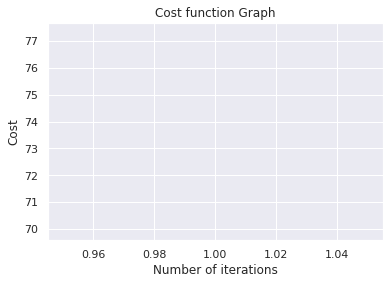

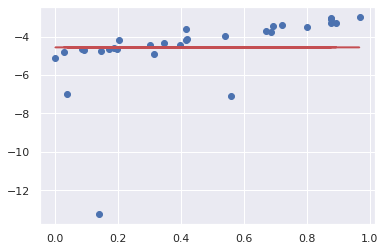

[-4.56707723e+00  1.11092362e-05]


In [86]:
model = LassoRegression(iterations = 5000, learning_rate = 1e-5, alpha = 15)
model.fit(x, y)

xfit = np.c_[np.ones((len(x), 1)), x]
yfit= model.predict(xfit)  

plt.plot(x, yfit, c = 'r')
plt.scatter(x, y)
plt.show()
print(model.W)

When alpha = 15, we can see from the graphs above lasso regression with a high penalty the coefficients tend to 0 while in the case of Ridge we alter the weight but the values remain non-zero.

## Robust regression

In [ ]:
class RobustRegression():
    # Class for least-squares linear regression:

    def __init__(self, potential, k):
        self.potential = potential
        self.k = k
        
    def mad(self, x):
        return(np.median(np.abs(x - np.median(x))))
        
    def weight_function(self, x, potential, k):
        if potential == "huber":
            if np.abs(x) <= k:
                return(1)
            else:
                return(k / np.abs(x))
        if potential == "bisquare":
            if np.abs(x) <= k:
                return((1 - (x / k) ** 2) ** 2)
            else:
                return(0)
    
    def fit(self, X, y):
        
        self.X_fit = np.c_[np.ones((len(X), 1)), X]

        self.m, self.n = self.X_fit.shape

        # weight initialization        
        self.W = np.zeros(self.n)

        self.y = y

        # Create list of values of cost function to examine convergence/ draw the plot
        self.cost_list = []

        i = 0
        while len(self.cost_list) < 2 or abs(self.cost_list[-1] - self.cost_list[-2]) > 10e-6:           
            self.update_weights()    
            i += 1

        # draw the plot of cost function
        plt.plot(np.arange(1, i), self.cost_list[1:], color = 'red')
        plt.title('Cost function Graph')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost')
        plt.show()

        return self

    def update_weights(self):

        y_pred = self.predict(self.X_fit)

        w = []

        for i in range(len(y_pred)):
            w.append(self.weight_function(self.y[i] - y_pred[i], self.potential, k = 1))
        
        dW = np.diag(w)

        # update weights    
        self.W = np.linalg.inv(self.X_fit.T @ dW @ self.X_fit) @ self.X_fit.T @ dW @ self.y

        # update cost function
        cost_value = np.linalg.norm(y_pred - self.y) / 2
        self.cost_list.append(cost_value)
        
    def predict(self, X):
        return X.dot(self.W)

Try it in the following data and compare with the performance of the different models:

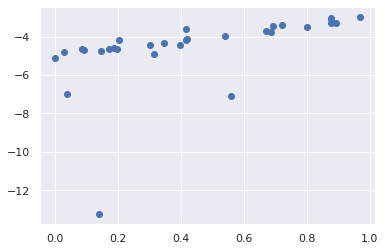

In [ ]:
np.random.seed(300)
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* np.random.standard_cauchy(30)
plt.scatter(x, y);


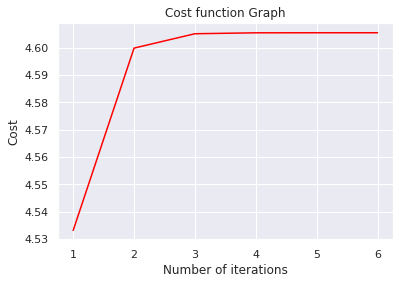

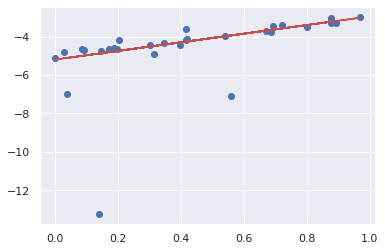

[-5.19639642  2.23904232]


In [ ]:
model = RobustRegression(potential = 'huber', k = 2)
model.fit(x, y)

xfit = np.c_[np.ones((len(x), 1)), x]
yfit= model.predict(xfit)  

plt.plot(x, yfit, c = 'r')
plt.scatter(x, y)
plt.show()
print(model.W)

From the graph of cost function we can see that it actually increase due to the outliers, but the fitting definitely seems robust against the outliers.

## Example: Predicting Bicycle Traffic

As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.

In this section, we joinned the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.

We will perform a simple linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

Let's start by loading the dataset:

In [106]:
import pandas as pd
daily = pd.read_csv('data-1.csv', index_col='Date', parse_dates=True)

With this in place, we can choose the columns to use, and fit a linear regression model to our data:

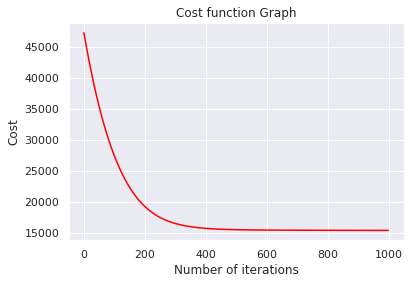

In [114]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)']
X = daily[column_names]
y = daily['Total']

from sklearn import preprocessing

xx = X.values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xx)

x_fit = np.c_[np.ones((len(X), 1)), X]
model = RidgeRegularization(alpha = 0.1, learning_rate = 1e-5)
model1 = MultivariateLinearRegression()
model.fit(X, y)
daily['predicted'] = model.predict(x_fit)

Finally, we can compare the total and predicted bicycle traffic visually:

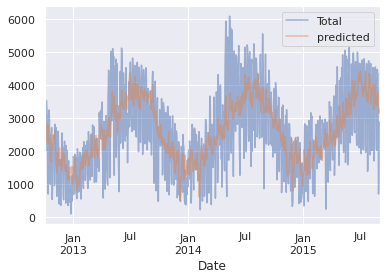

In [115]:
daily[['Total', 'predicted']].plot(alpha=0.5);

It is evident that we have missed some key features, especially during the summer time.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).
Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [117]:
params = pd.Series(model.W, index=pd.concat([pd.Series(["Intercept"]),pd.Series(X.columns.values)]))
params

Intercept         8.177870
Mon               2.332451
Tue               2.875198
Wed               2.854542
Thu               2.444935
Fri               1.592729
Sat              -1.905769
Sun              -2.016216
holiday          -0.074146
daylight_hrs    104.210313
PRCP             -0.765463
dry day           7.914484
Temp (C)        106.975300
dtype: float64

We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays.
We see that for each additional hour of daylight, 129 ± 9 more people choose to ride; a temperature increase of one degree Celsius encourages 65 ± 4 people to grab their bicycle; a dry day means an average of 548 ± 33 more riders, and each inch of precipitation means 665 ± 62 more people leave their bike at home.
Once all these effects are accounted for, we see a modest increase of 27 ± 18 new daily riders each year.

Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation *and* cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model.
Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).
These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!